In [2]:
library(tidyverse)
library(sf)
library(leaflet)
library(viridis)
library(htmlwidgets)
library(IRdisplay)

library(stringr)
library(lubridate)
library(janitor)
library(tigris)


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

Warning message:
"package 'janitor' was built under R version 3.6.1"
Attaching package: 'janitor'

The following objects are masked from 'package:stats':

    chisq.test, fisher.test

Warning message:
"package 'tigris' was built under R version 3.6.1"To enable 
caching of data, set `options(tigris_use_cache = TRUE)` in your R script or .Rprofile.

Attaching package: 'tigris'

The following object is masked from 'package:graphics':

    plot



In [3]:
# 1. read in community district shapefile
cd <- st_read("nycd.shp")

Reading layer `nycd' from data source `C:\Users\aslop\R FOR DATA SCIENCE\Waste NYC\nycd.shp' using driver `ESRI Shapefile'
Simple feature collection with 71 features and 6 fields
geometry type:  MULTIPOLYGON
dimension:      XY
bbox:           xmin: -74.25559 ymin: 40.49612 xmax: -73.70001 ymax: 40.91553
epsg (SRID):    4326
proj4string:    +proj=longlat +datum=WGS84 +no_defs


In [4]:
head(cd)

Registered S3 method overwritten by 'geojsonio':
  method         from 
  print.location dplyr


borocd,shape_leng,shape_area,cartodb_id,created_at,updated_at,geometry
<int>,<dbl>,<dbl>,<int>,<date>,<date>,<MULTIPOLYGON [°]>
480,45440.92,32723604,4,2015-04-07,2015-04-07,MULTIPOLYGON (((-73.86275 4...
405,70097.83,210385391,27,2015-04-07,2015-04-07,MULTIPOLYGON (((-73.8877 40...
307,88672.45,104136255,15,2015-04-07,2015-04-07,MULTIPOLYGON (((-73.98017 4...
501,157923.97,376963080,7,2015-04-07,2015-04-07,MULTIPOLYGON (((-74.15946 4...
318,190218.26,235680520,8,2015-04-07,2015-04-07,MULTIPOLYGON (((-73.91513 4...
104,67935.23,49291812,18,2015-04-07,2015-04-07,MULTIPOLYGON (((-73.99394 4...


In [8]:
# 2. read in waste data
ton_traj_2 <- read_csv("ton_traj_2.csv")

Parsed with column specification:
cols(
  year = col_double(),
  borough.x = col_character(),
  boroughcd = col_double(),
  borough_full = col_character(),
  refuse = col_double(),
  paper = col_double(),
  mgp = col_double(),
  organics = col_double(),
  schools = col_double(),
  refuse_person = col_double(),
  paper_person = col_double(),
  mgp_person = col_double(),
  organics_person = col_double(),
  schools_person = col_double()
)


In [9]:
head(ton_traj_2)

year,borough.x,boroughcd,borough_full,refuse,paper,mgp,organics,schools,refuse_person,paper_person,mgp_person,organics_person,schools_person
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1995,Bronx,201,"Bronx_Melrose, Mott Haven, Port Morris",26316.2,452.3,566.3,0,0,575.2363,9.886663,12.37855,0,0
1995,Bronx,202,"Bronx_Hunts Point, Longwood",18415.6,373.9,588.2,0,0,704.9573,14.313057,22.51656,0,0
1995,Bronx,203,"Bronx_Morrisania, Crotona Park East",23453.3,420.5,554.1,0,0,588.0820,10.543868,13.89383,0,0
1995,Bronx,204,"Bronx_Highbridge, Concourse Village",49047.8,1318.4,1367.1,0,0,669.8643,18.005886,18.67100,0,0
1995,Bronx,205,"Bronx_University Hts., Fordham, Mt. Hope",44555.1,985.4,1458.0,0,0,695.0874,15.372855,22.74571,0,0
1995,Bronx,206,"Bronx_East Tremont, Belmont",24611.3,533.2,748.0,0,0,591.1346,12.806841,17.96609,0,0


In [10]:
# 3. join shapefile and waste data
joined <- left_join(cd,
                    ton_traj_2,
                    by = c("borocd" = "boroughcd"))

In [17]:
joined_2018 <- joined %>% 
filter(year == "2018")

head(joined_2018)

borocd,shape_leng,shape_area,cartodb_id,created_at,updated_at,year,borough.x,borough_full,refuse,paper,mgp,organics,schools,refuse_person,paper_person,mgp_person,organics_person,schools_person,geometry
<dbl>,<dbl>,<dbl>,<int>,<date>,<date>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<MULTIPOLYGON [°]>
405,70097.83,210385391,27,2015-04-07,2015-04-07,2018,Queens,"Queens_Ridgewood, Glendale, Maspeth",48018.8,6272.5,7108.4,1440.0,472.6,567.6317,74.14741,84.02861,17.022283,5.586619,MULTIPOLYGON (((-73.8877 40...
307,88672.45,104136255,15,2015-04-07,2015-04-07,2018,Brooklyn,"Brooklyn_Sunset Park, Windsor Terrace",33211.1,4320.2,4128.9,931.3,496.5,526.1998,68.44966,65.41868,14.755605,7.866593,MULTIPOLYGON (((-73.98017 4...
501,157923.97,376963080,7,2015-04-07,2015-04-07,2018,Staten Island,"Staten Island_Stapleton, Port Richmond",53072.6,6448.4,6634.6,1752.5,0.0,603.9350,73.37900,75.49785,19.942420,0.000000,MULTIPOLYGON (((-74.15946 4...
318,190218.26,235680520,8,2015-04-07,2015-04-07,2018,Brooklyn,"Brooklyn_Canarsie, Flatlands",56739.4,5748.9,5980.1,0.0,0.0,586.3235,59.40695,61.79609,0.000000,0.000000,MULTIPOLYGON (((-73.91513 4...
104,67935.23,49291812,18,2015-04-07,2015-04-07,2018,Manhattan,"Manhattan_Chelsea, Clinton",24498.5,5029.3,3966.6,171.7,0.0,474.5702,97.42457,76.83859,3.326069,0.000000,MULTIPOLYGON (((-73.99394 4...
313,65747.26,88148955,31,2015-04-07,2015-04-07,2018,Brooklyn,"Brooklyn_Coney Island, Brighton Beach",21436.8,1912.1,2209.9,279.4,0.0,411.1471,36.67312,42.38478,5.358753,0.000000,MULTIPOLYGON (((-73.98372 4...


### Visualise types of waste by person in 2018

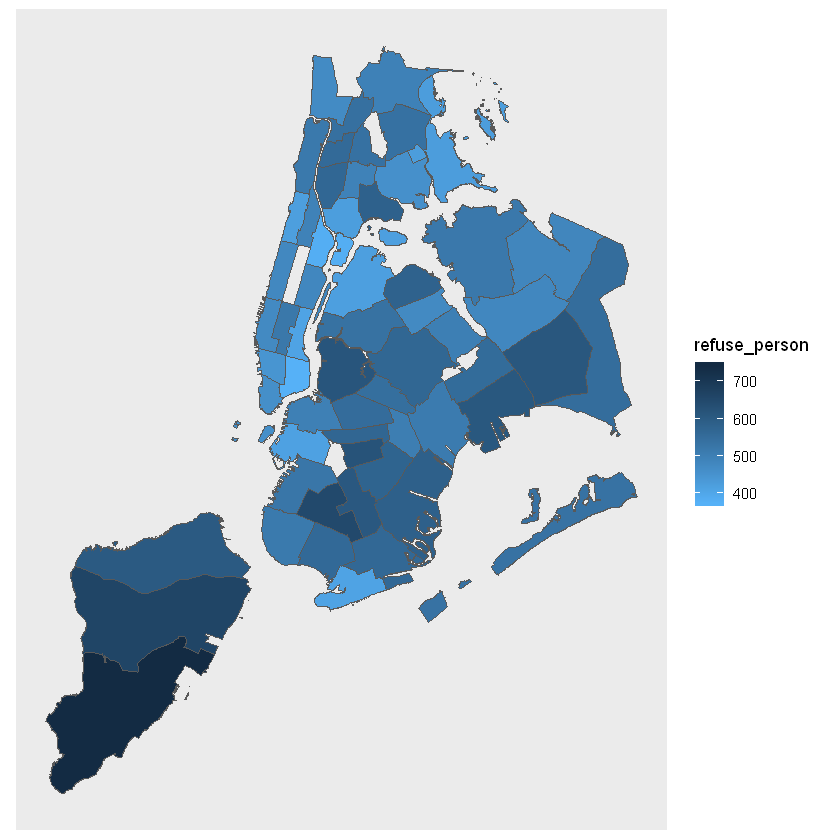

In [19]:
ggplot(joined_2018, aes(fill = refuse_person)) +
  geom_sf() +
  coord_sf(crs = 3083, datum = NA) +
  scale_fill_gradient(low = "#56B1F7", high = "#132B43")

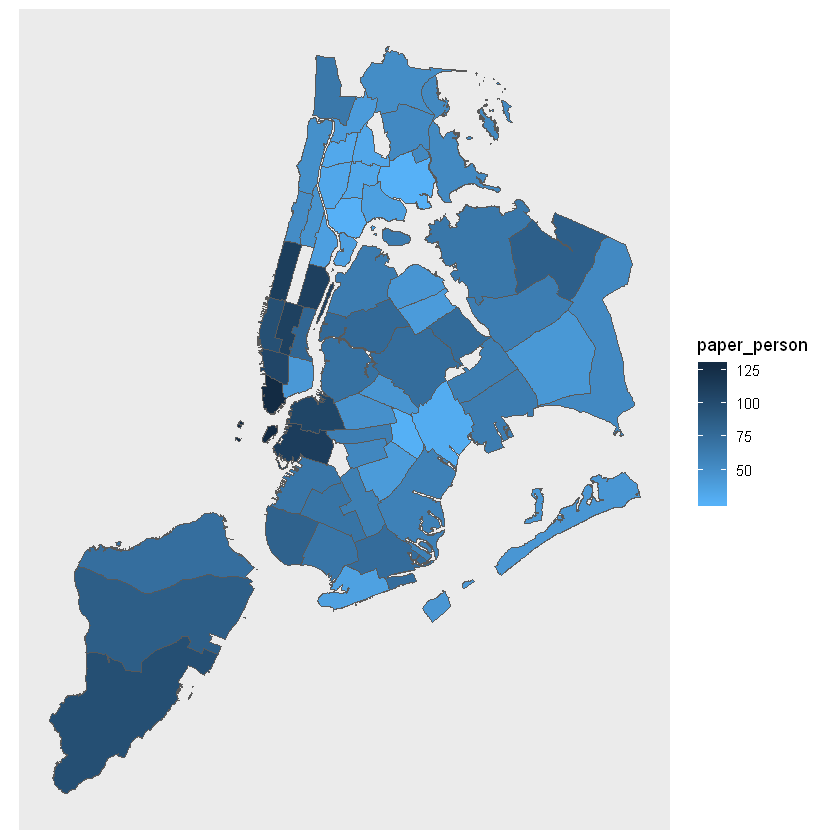

In [20]:
ggplot(joined_2018, aes(fill = paper_person)) +
  geom_sf() +
  coord_sf(crs = 3083, datum = NA) +
  scale_fill_gradient(low = "#56B1F7", high = "#132B43")

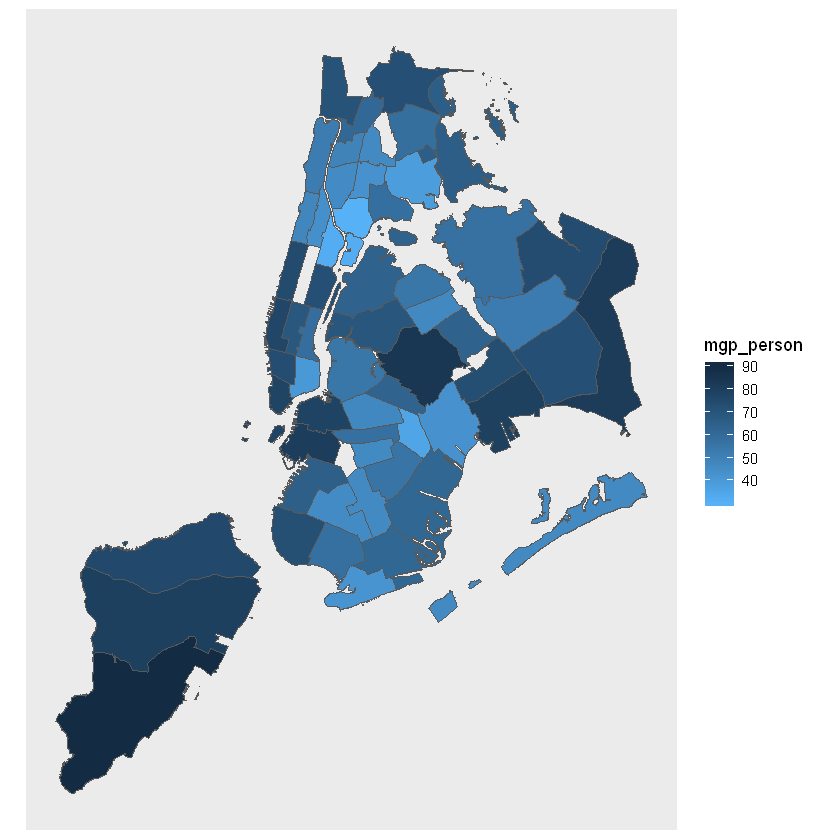

In [21]:
ggplot(joined_2018, aes(fill = mgp_person)) +
  geom_sf() +
  coord_sf(crs = 3083, datum = NA) +
  scale_fill_gradient(low = "#56B1F7", high = "#132B43")

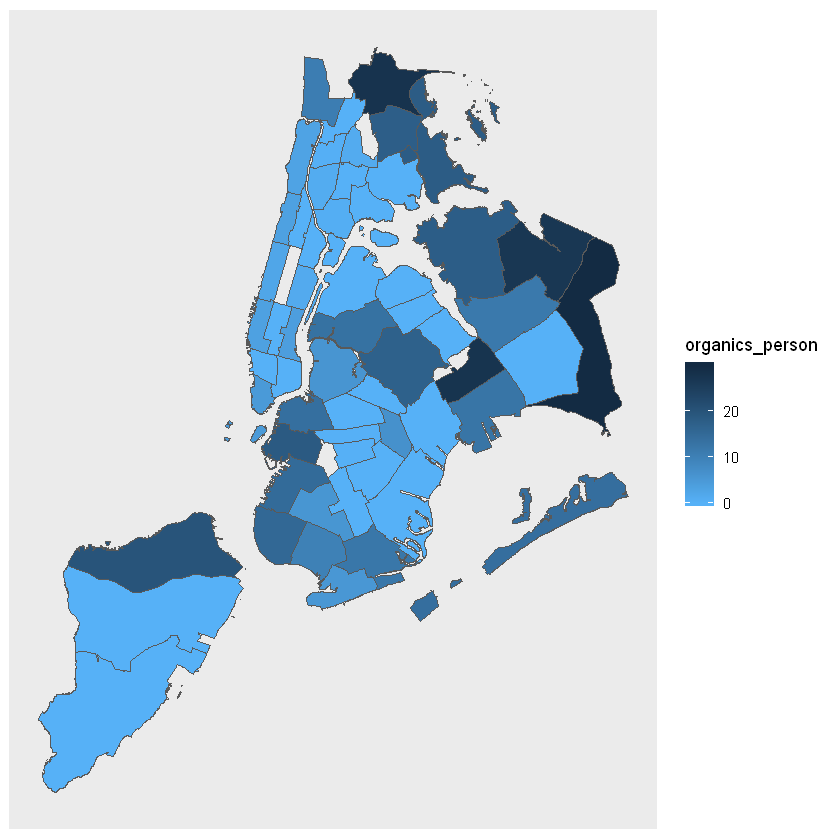

In [22]:
ggplot(joined_2018, aes(fill = organics_person)) +
  geom_sf() +
  coord_sf(crs = 3083, datum = NA) +
  scale_fill_gradient(low = "#56B1F7", high = "#132B43")

In [ ]:
# overlay the location of sanitation stations?

### Interactive mapping with the leaflet package

In [23]:
m = leaflet() %>% 
  addTiles()

saveWidget(m, 'demo.html', selfcontained = F)
display_html('<iframe src="demo.html"></iframe>')

In [31]:
# MAP OF REFUSE WASTE TONNAGE in 2018

pal <- colorNumeric(palette = "Blues", 
                    domain = c(min(joined_2018$refuse_person), 
                               max(joined_2018$refuse_person)), 
                    na.color = "grey")


popup <- paste(sep = "<br/>", 
               paste0("<b>Borough: </b>", joined_2018$borough), 
               paste0("<b>District: </b>", joined_2018$borocd),
               paste0("<b>Tonnage: </b>", joined_2018$paper))


nyc_waste <- leaflet(joined_2018, options = 
            leafletOptions(dragging = FALSE,
                           minZoom = 10, 
                           maxZoom = 15)) %>%
addProviderTiles("CartoDB.Positron") %>%
addPolygons(group = "continuous",
            stroke = TRUE, 
            smoothFactor = 0.5, 
            fillOpacity = 1,
            weight = 0.5,
            fillColor = ~pal(refuse_person),
            popup = popup) %>% 
addLegend(position = "topleft", pal = pal, values = joined_2018$refuse_person,
          title = "Refuse Tonnage",
          opacity = 0.6) 

In [27]:
IRdisplay::display_html('<iframe src="http://www.w3schools.com" width=1000, height=1000></iframe> ') 

In [32]:
saveWidget(nyc_waste, 'demo.html', selfcontained = F)
display_html('<iframe src="demo.html" width=900, height=500></iframe>')

In [57]:
# View top 10 most refuse-generating neighhorhoods in 1995  
frame1 <- ton_traj_2 %>% 
  filter(year == 1995) %>% 
  select(borough.x, borough_full, refuse_person) %>% 
  group_by(borough.x, borough_full) %>% 
  summarise(sum = sum(refuse_person)) %>% 
  as.data.frame() %>% 
  arrange(desc(sum)) %>% 
  head(10)

frame1

borough.x,borough_full,sum
<chr>,<chr>,<dbl>
Queens,"Queens_Queens Village, Rosedale",827.5164
Queens,"Queens_Ozone Park, Howard Beach",810.7373
Staten Island,"Staten Island_Tottenville, Woodrow, Great Kills",805.2769
Queens,"Queens_Jamaica, St. Albans, Hollis",796.2031
Brooklyn,"Brooklyn_Crown Heights South, Wingate",785.9350
Staten Island,"Staten Island_New Springville, South Beach",784.8291
Manhattan,"Manhattan_Washington Heights, Inwood",779.6885
Brooklyn,"Brooklyn_East Flatbush, Rugby, Farragut",771.5894
Brooklyn,Brooklyn_Crown Heights North,740.8599


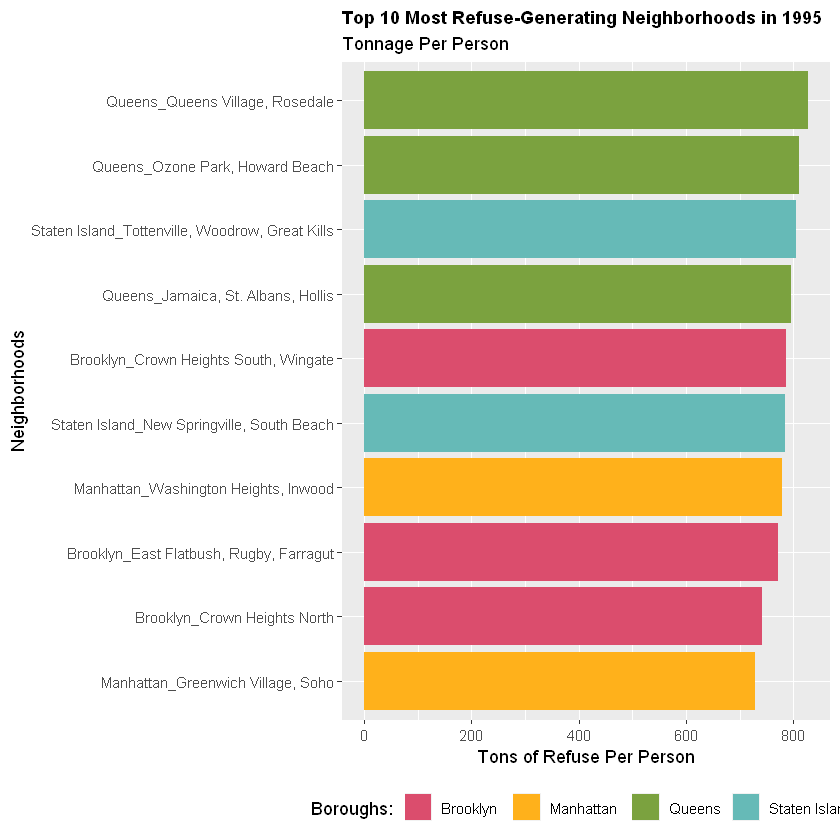

In [58]:
# plot this dataframe
ggplot(frame1, aes(x = reorder(borough_full, sum), y = `sum`, fill = `borough.x`)) +
  geom_bar(stat = "identity") +
  coord_flip() +
#  ggtitle("Top 10 Most Refuse-Generating Neighborhoods in 1995") +
  theme(legend.position = "bottom") +
  scale_y_continuous("Tons of Refuse Per Person", labels = scales::comma) +
  scale_x_discrete("Neighborhoods") +
  scale_fill_manual(values = c("#DB4D6D", "#FFB11B", "#7BA23F", "#66BAB7", "#9B90C2"), name ="Boroughs:") +
  theme(plot.title = element_text(size = 11, face = "bold")) +

  labs(title = "Top 10 Most Refuse-Generating Neighborhoods in 1995",
       subtitle = "Tonnage Per Person") 

In [61]:
# View top 10 most refuse-generating neighhorhoods in 2018  
frame2 <- ton_traj_2 %>% 
  filter(year == 2018) %>% 
  select(borough.x, borough_full, refuse_person) %>% 
  group_by(borough.x, borough_full) %>% 
  summarise(sum = sum(refuse_person)) %>% 
  as.data.frame() %>% 
  arrange(desc(sum)) %>% 
  head(10)

frame2

borough.x,borough_full,sum
<chr>,<chr>,<dbl>
Staten Island,"Staten Island_Tottenville, Woodrow, Great Kills",741.3666
Staten Island,"Staten Island_New Springville, South Beach",662.2562
Brooklyn,"Brooklyn_Borough Park, Ocean Parkway",650.8282
Brooklyn,"Brooklyn_Crown Heights South, Wingate",621.7842
Brooklyn,"Brooklyn_Williamsburg, Greenpoint",616.4268
Queens,"Queens_Jamaica, St. Albans, Hollis",612.4620
Queens,"Queens_Ozone Park, Howard Beach",609.6261
Brooklyn,"Brooklyn_Flatbush, Midwood",607.8026
Staten Island,"Staten Island_Stapleton, Port Richmond",603.9350


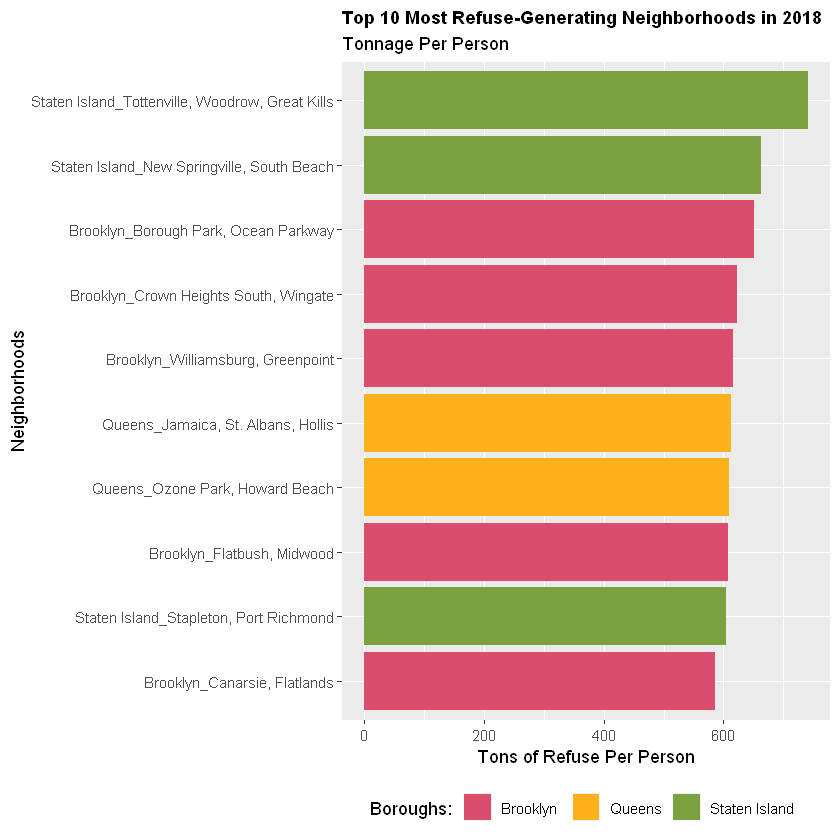

In [62]:
# plot this dataframe
ggplot(frame2, aes(x = reorder(borough_full, sum), y = `sum`, fill = `borough.x`)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  #ggtitle("Top 10 Most Refuse-Generating Neighborhoods in 2018") +
  theme(legend.position = "bottom") +
  scale_y_continuous("Tons of Refuse Per Person", labels = scales::comma) +
  scale_x_discrete("Neighborhoods") +
  scale_fill_manual(values = c("#DB4D6D", "#FFB11B", "#7BA23F", "#66BAB7", "#9B90C2"), name ="Boroughs:") +
  theme(plot.title = element_text(size = 11, face = "bold")) +

  labs(title = "Top 10 Most Refuse-Generating Neighborhoods in 2018",
       subtitle = "Tonnage Per Person") 